## Step 1: Reading and Understanding the Data

In [2]:
#importing the modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [96]:
#load the data into dataframe
housing_df=pd.read_csv(r'train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
housing_df.shape

(1460, 81)

In [99]:
#Dropping the columns having all null values
housing_df.dropna(axis=1,how='all',inplace=True)
housing_df.shape

(1460, 81)

In [100]:
#Calculating the percentage of missing values in each column
missing=(housing_df.isnull().sum()/housing_df.shape[0]*100).sort_values(ascending=False).reset_index()
missing.columns=['Column_name','Missing_val_percentage']
pd.concat([missing[:41],missing[41:].reset_index(drop=True)],axis=1)

,Column_name,Missing_val_percentage,Column_name,Missing_val_percentage
0,PoolQC,99.520548,Neighborhood,0.0
1,MiscFeature,96.301370,LotShape,0.0
2,Alley,93.767123,LandContour,0.0
3,Fence,80.753425,LandSlope,0.0
4,FireplaceQu,47.260274,SalePrice,0.0
5,LotFrontage,17.739726,HeatingQC,0.0
6,GarageCond,5.547945,BsmtFinSF2,0.0
7,GarageType,5.547945,EnclosedPorch,0.0
8,GarageYrBlt,5.547945,Fireplaces,0.0
9,GarageFinish,5.547945,GarageCars,0.0


In [101]:
#As given in the dictionary,the null values in the given columns indicate the absence of facility but does not mean missing
#So imputing the categorical variables with 'None'
meaningful_columns_with_null = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in meaningful_columns_with_null:
    housing_df[i].fillna("None", inplace=True)

In [102]:
housing_df['Electrical'].dropna(inplace=True)

In [103]:
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [104]:
housing_df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [105]:
housing_df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [106]:
#Function to impute the numerical columns with Median value and Categorical columns with the most frequent value
import numpy as np
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column and Columns of other types are imputed with median of column.


        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [107]:
#Apply the function on the dataframe
housing_df[['LotFrontage','GarageYrBlt','MasVnrArea']]=DataFrameImputer().fit_transform(housing_df[['LotFrontage','GarageYrBlt','MasVnrArea']])
#housing_df_clean[['LotFrontage','GarageYrBlt','MasVnrArea']]=housing_df_subset[['LotFrontage','GarageYrBlt','MasVnrArea']]
housing_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [108]:
housing_df_clean=housing_df
housing_df_clean.shape

(1460, 81)

In [109]:
housing_df_clean=housing_df_clean.drop('Id',axis=1)
housing_df_clean.shape

(1460, 80)

In [110]:
housing_df_clean_num=housing_df_clean.select_dtypes(['int64','float64'])
housing_df_clean_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Data Visualizing

In [111]:
import seaborn as sns

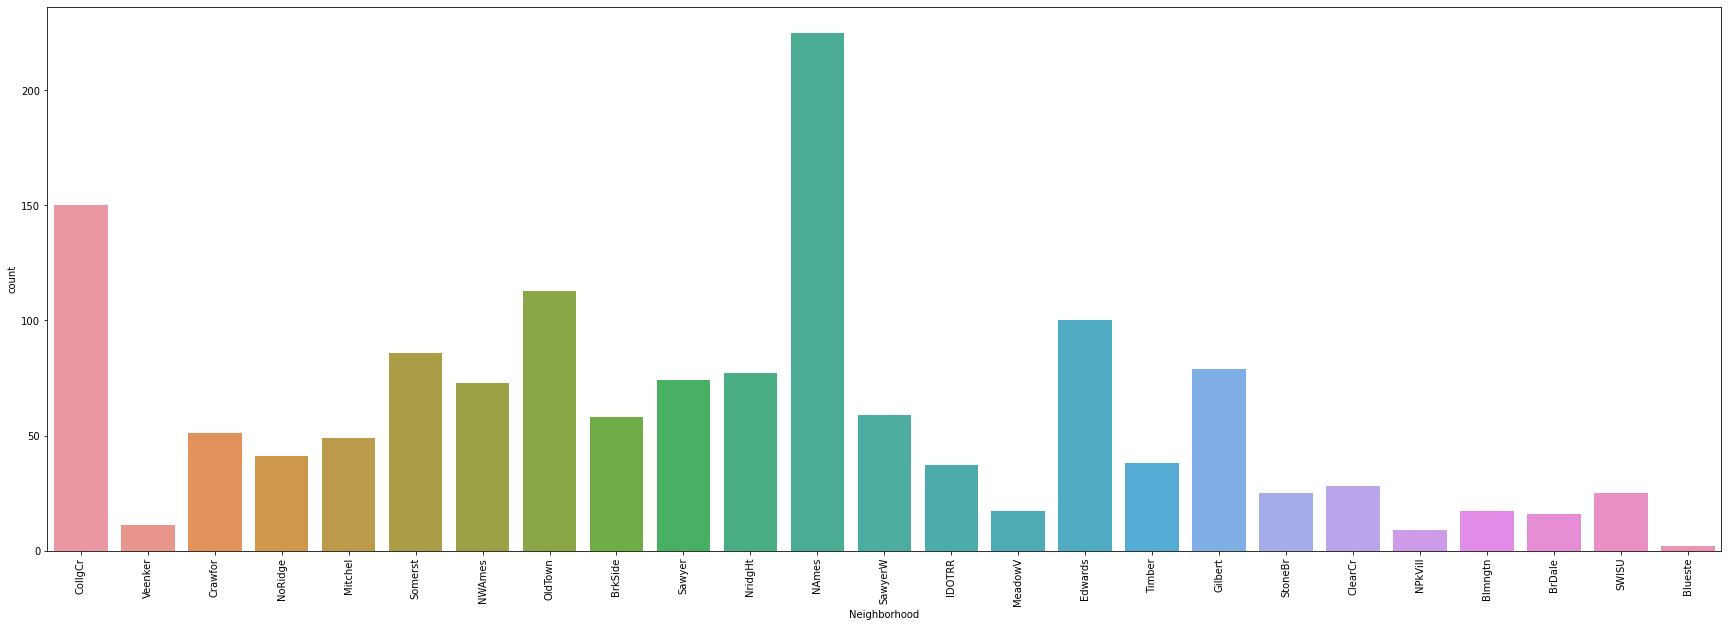

In [112]:
plt.figure(figsize=(30,10))
sns.countplot(housing_df_clean.Neighborhood)
plt.xticks(rotation=90)
plt.show()

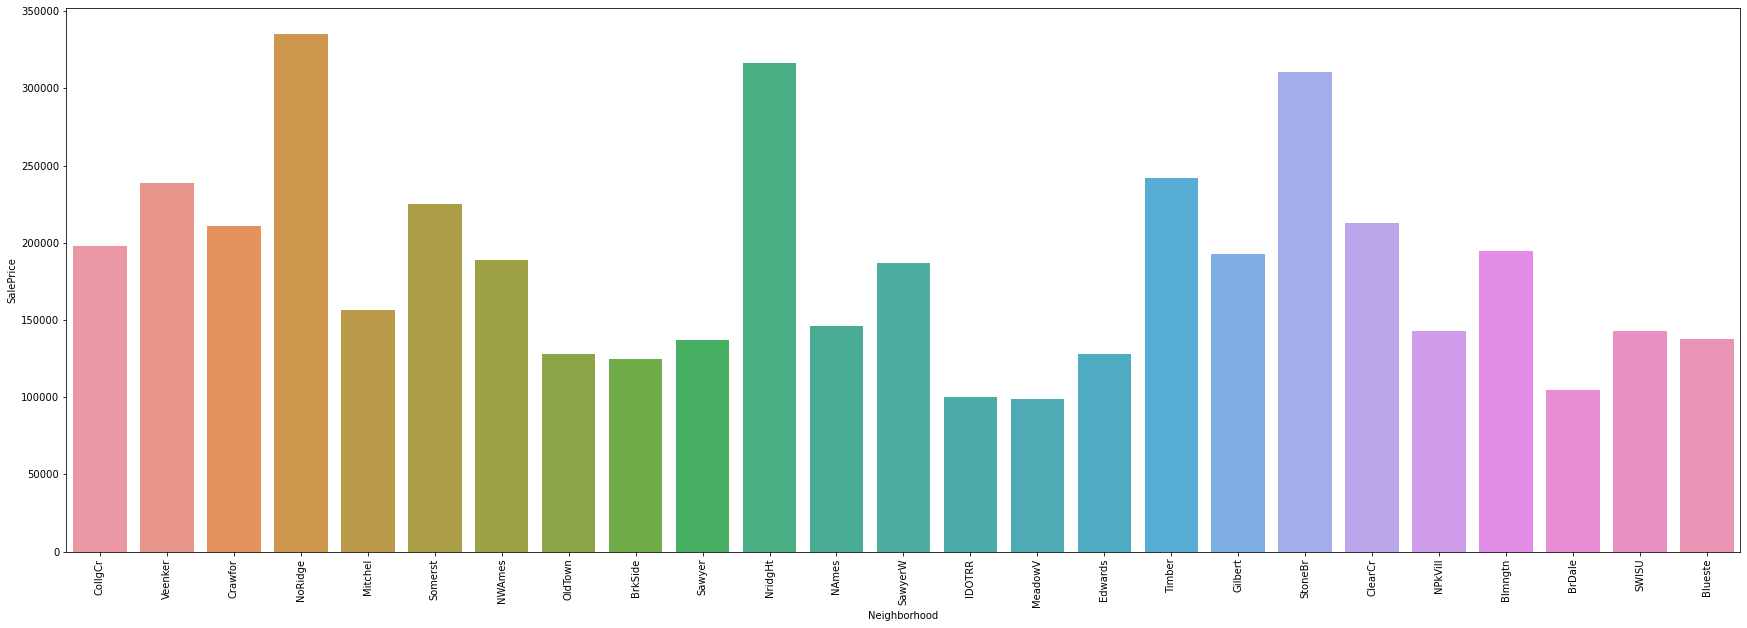

In [113]:
plt.figure(figsize=(30,10))
sns.barplot(x='Neighborhood',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

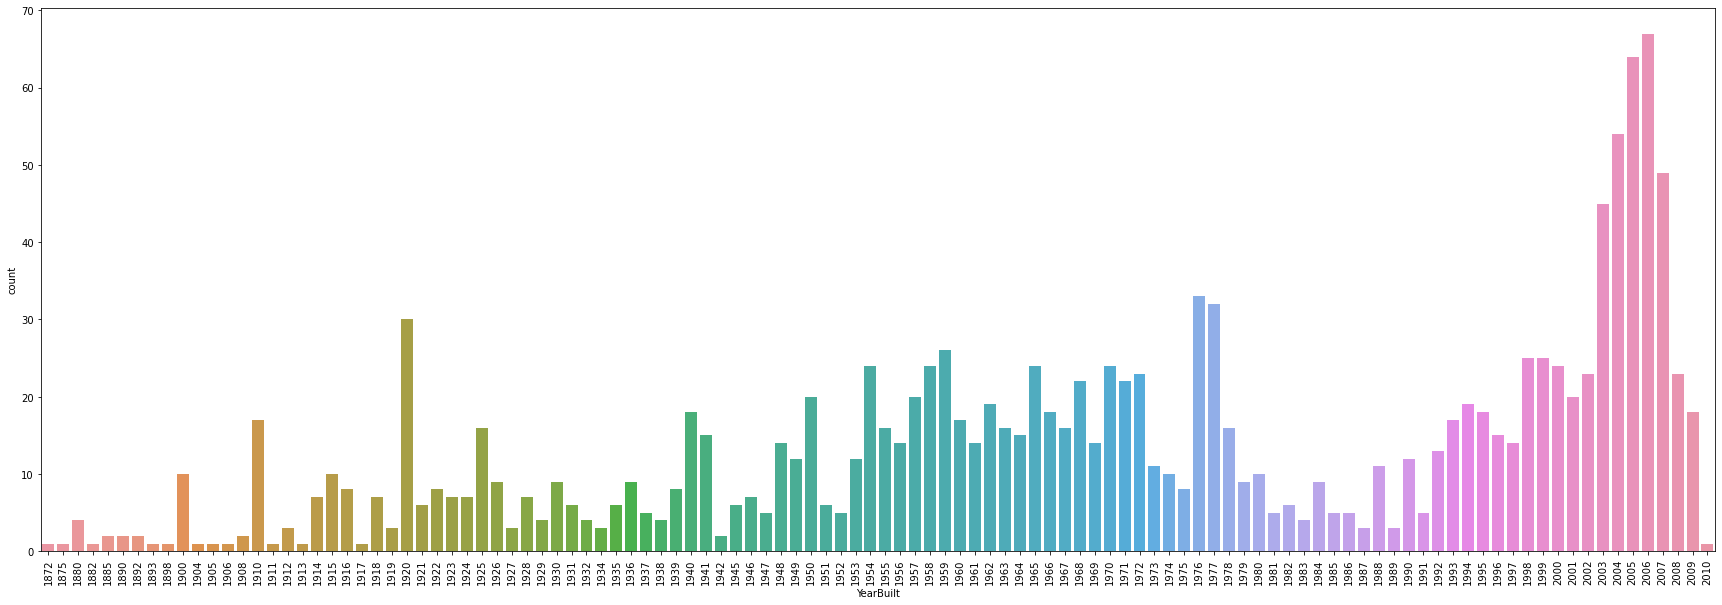

In [114]:
plt.figure(figsize=(30,10))
sns.countplot(housing_df_clean.YearBuilt)
plt.xticks(rotation=90)
plt.show()

There are lot of houses which are build in past 5-10 years

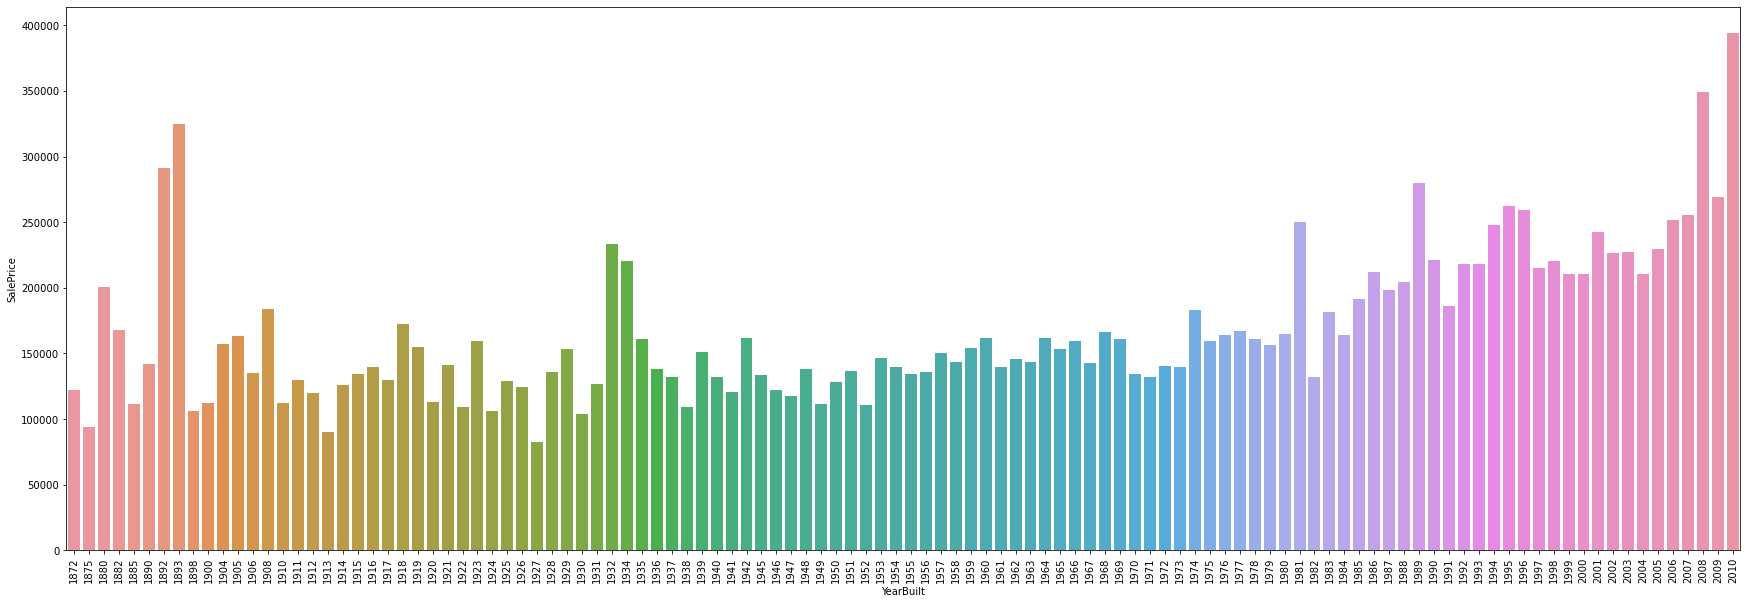

In [115]:
plt.figure(figsize=(30,10))
sns.barplot(x='YearBuilt',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

Sales prices are being increased in past few years when compared to late 1900's and early 2000's.
So its a good sign for the Surprise housing who can make more money by entering Australian market

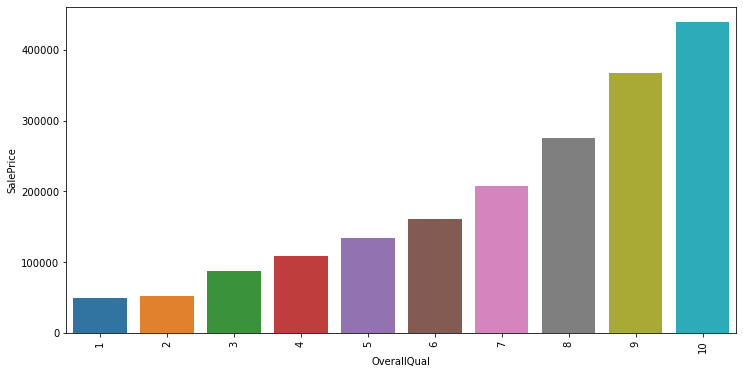

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(x='OverallQual',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

The Sale price is increasing as the overall quality of house is increasing.

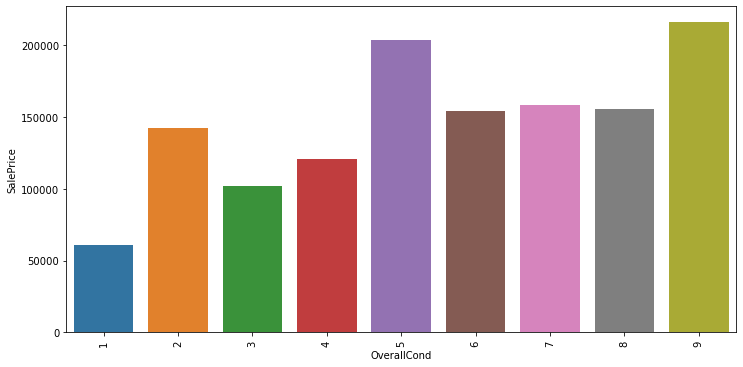

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x='OverallCond',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

On an average the sale price is above or equal to 1,50,000 if the overall condition is above 4 .

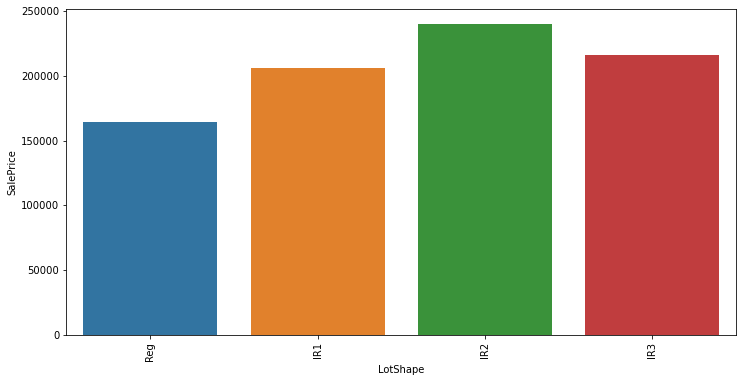

In [118]:
plt.figure(figsize=(12,6))
sns.barplot(x='LotShape',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

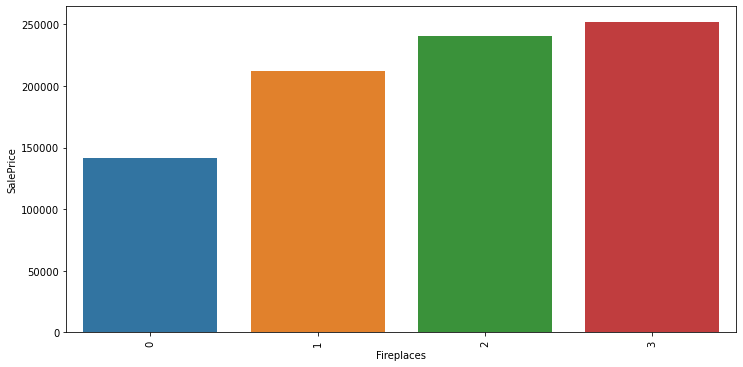

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fireplaces',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

The sale price of house have a positive relation with the number of fireplaces.
This can be an indication that people are ready to spend more on buying an house when it comes to safety.

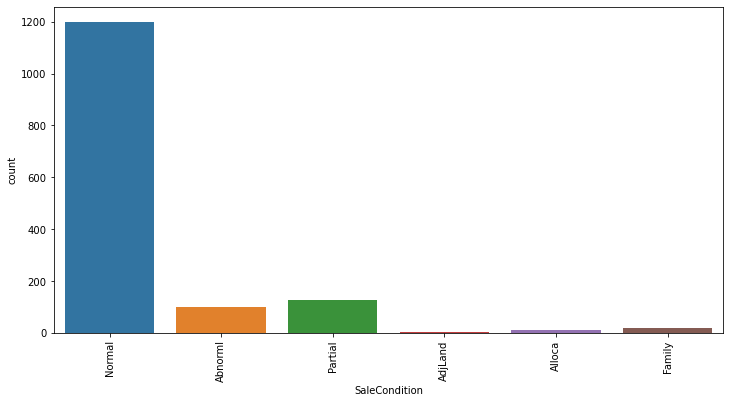

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(housing_df_clean.SaleCondition)
plt.xticks(rotation=90)
plt.show()

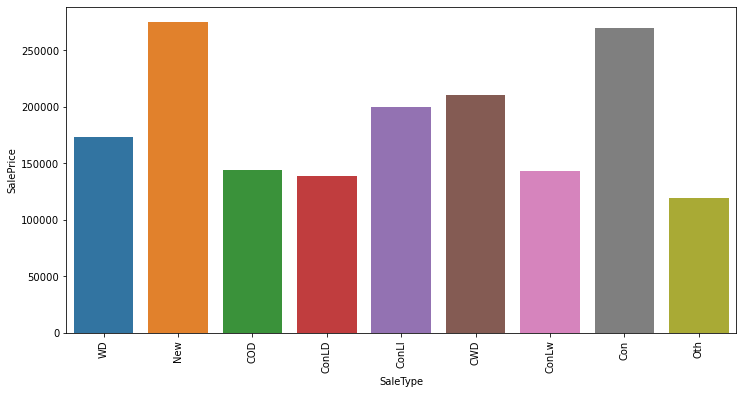

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(x='SaleType',y='SalePrice',data=housing_df_clean,ci=False)
plt.xticks(rotation=90)
plt.show()

The sale price is high for those houses which are newly constucted and sold or Contract 15% Down payment regular terms

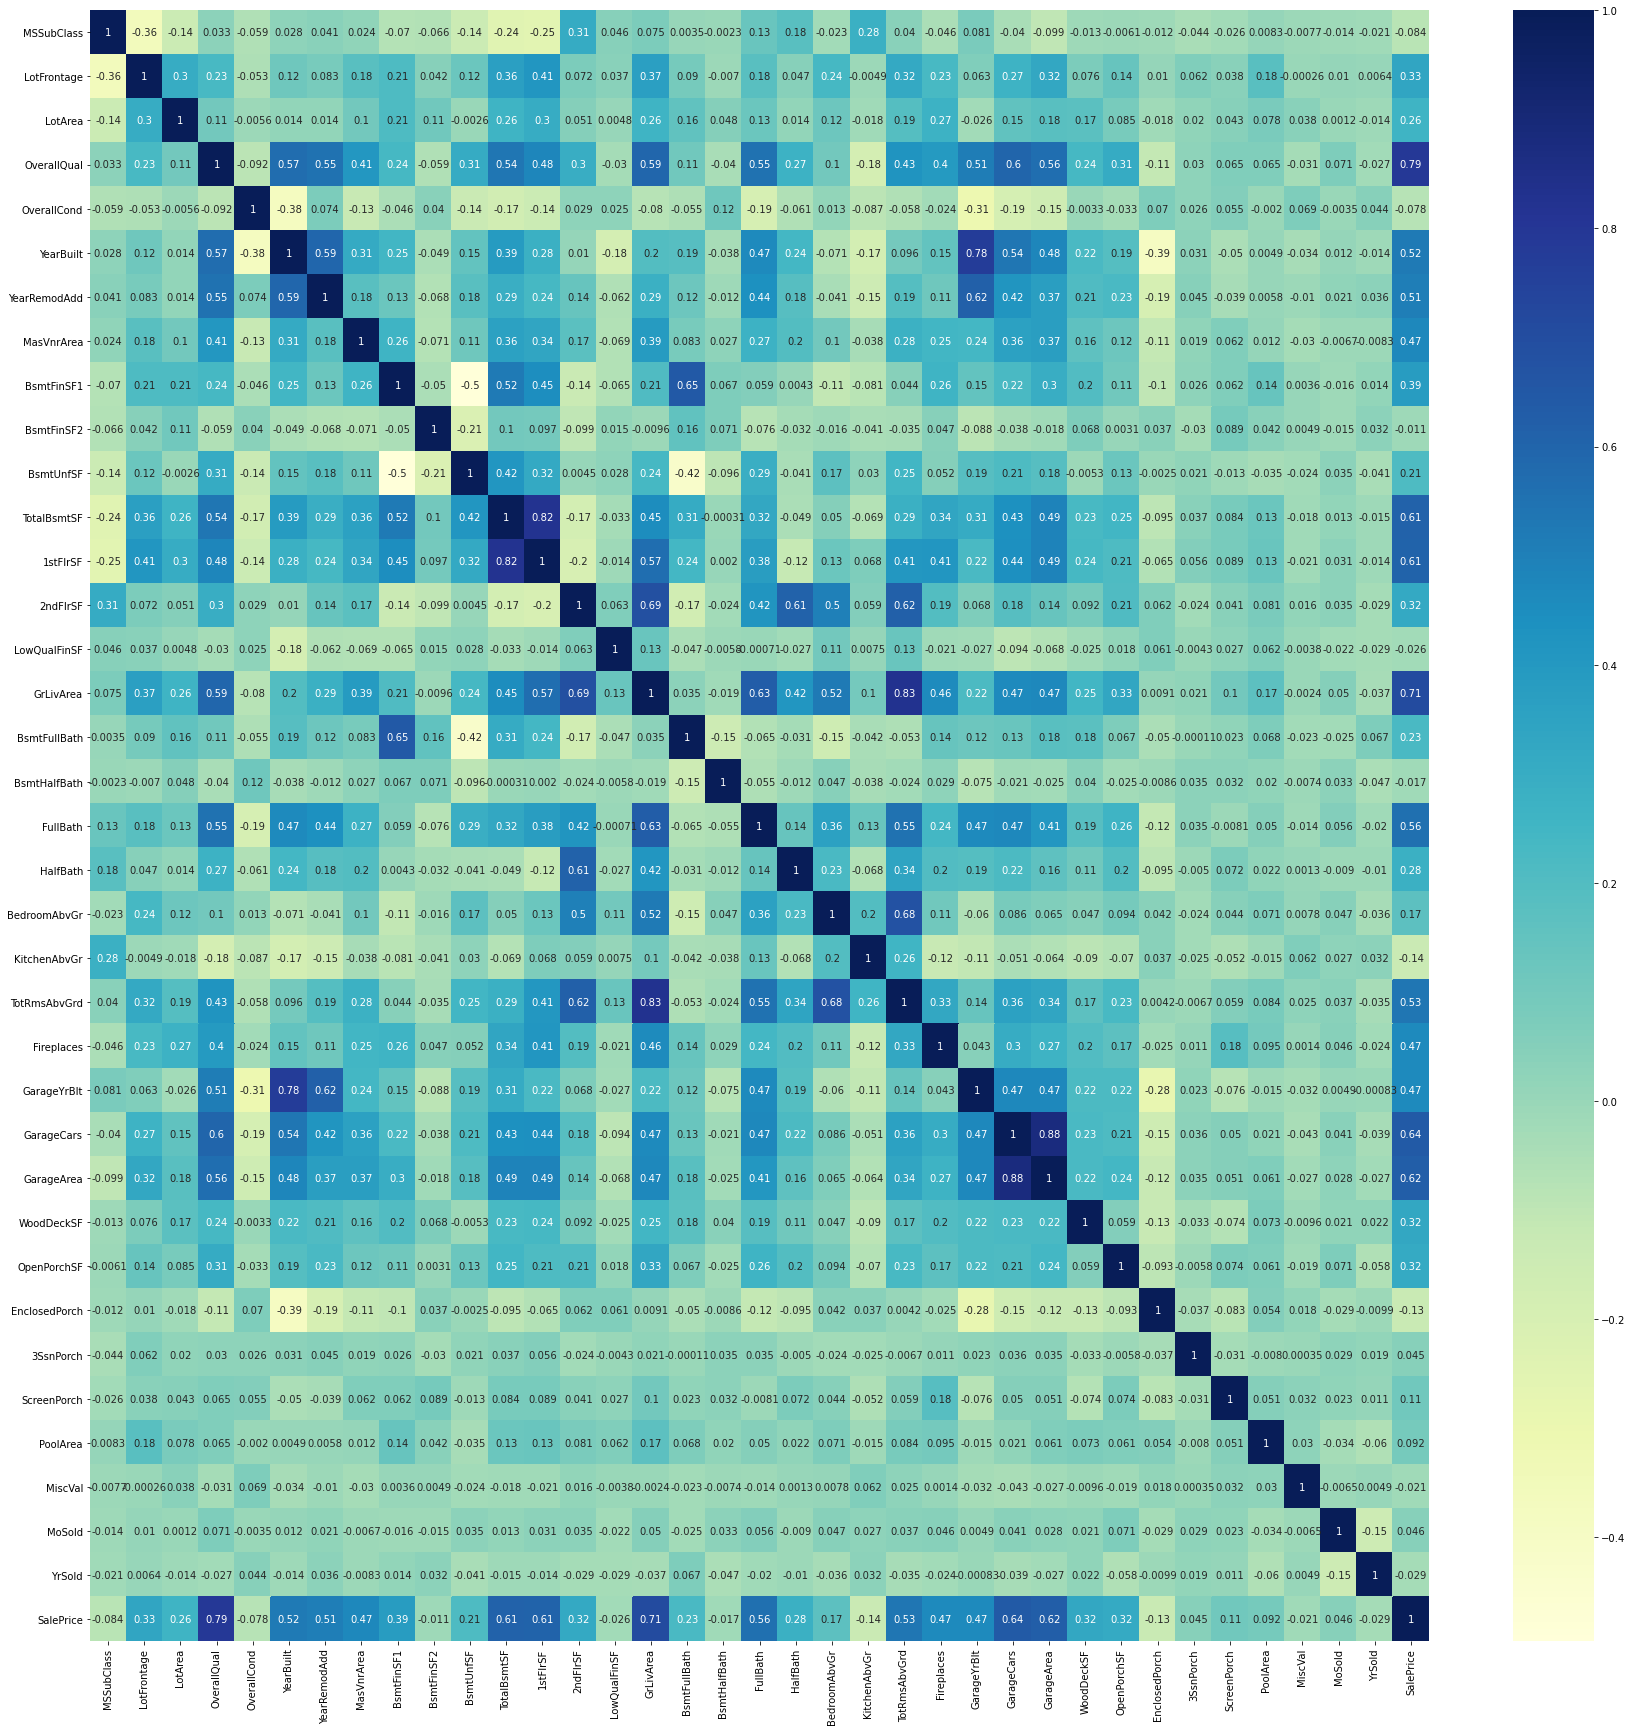

In [122]:
#Checking correlation between all the feature variables
correlation=housing_df_clean_num.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

Clearly there are lot of variables which are correlated with each other. This shows multi-collinearity between the independent(feature) variables. 

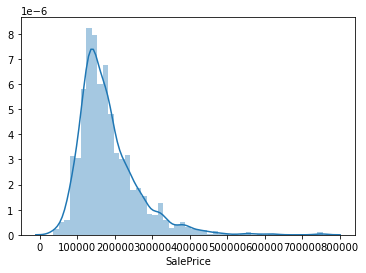

In [123]:
#Check if the target variable is normally distributed or not
sns.distplot(housing_df_clean.SalePrice)
plt.show()

We can see that the sale price is skewed towards left so need to use log to make the distribution at centre

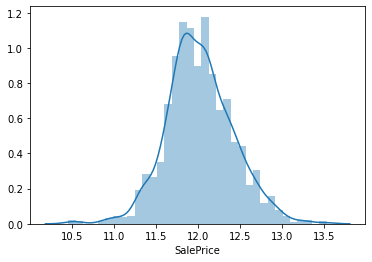

In [124]:
housing_df_clean['SalePrice']=np.log1p(housing_df_clean['SalePrice'])
sns.distplot(housing_df_clean.SalePrice)
plt.show()

In [125]:
#Deriving new columns eliminating the existing columns
housing_df_clean['HouseAge']=housing_df_clean['YearBuilt'] - housing_df_clean['YrSold']
housing_df_clean.shape

(1460, 81)

In [126]:
#Dropping those columns which are not relevent for deriving the best model parameters
housing_df_clean=housing_df_clean.drop(['MoSold','YrSold','MiscVal','MasVnrType','MasVnrArea','GarageYrBlt','TotRmsAbvGrd','BsmtUnfSF','GarageCars','YearBuilt','YearRemodAdd'],axis=1)
housing_df_clean.shape

(1460, 70)

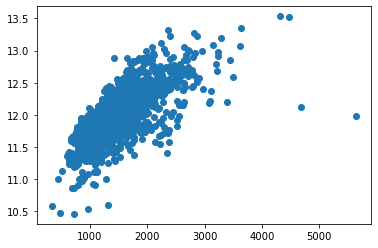

In [127]:
plt.scatter(x = housing_df_clean['GrLivArea'], y = housing_df_clean['SalePrice'])
plt.show()

Need to drop those which are greater than 4000, as these are the outliers.

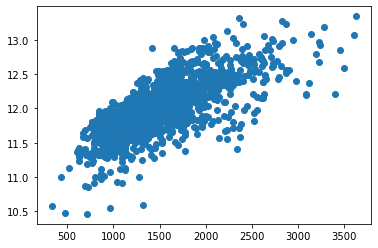

In [128]:
housing_df_clean=housing_df_clean.drop(housing_df_clean[(housing_df_clean['GrLivArea']>4000)].index)
plt.scatter(x = housing_df_clean['GrLivArea'], y = housing_df_clean['SalePrice'])
plt.show()

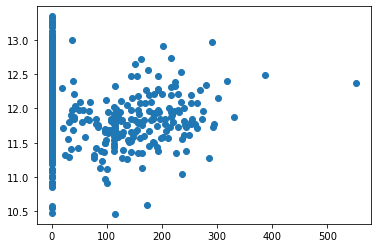

In [129]:
plt.scatter(x = housing_df_clean['EnclosedPorch'], y = housing_df_clean['SalePrice'])
plt.show()

This is the Enclosed porch area in square feet so this can be a natural data no need to consider as outlier.

## Data Preperation

In [130]:
#Creating the dummy variables for all the categorical columns
housing_df_clean_dum=pd.get_dummies(housing_df_clean,drop_first=True)
housing_df_clean_dum.shape

(1456, 247)

In [131]:
housing_df_clean_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,706,0,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,978,0,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,486,0,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,216,0,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,655,0,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [132]:
X=housing_df_clean_dum.drop(['SalePrice'],axis=1)
X.shape

(1456, 246)

In [133]:
y=housing_df_clean_dum['SalePrice']
y.shape

(1456,)

In [134]:
col_data_types=housing_df_clean.dtypes
col_dt_num=col_data_types[(col_data_types=='int64')|(col_data_types=='float64')]
numeric_features_list=list(col_dt_num.index)
numeric_features_list.remove('SalePrice')

In [135]:
numeric_features_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'HouseAge']

## Splitting the data into train and test sets
- 70% for training 
- 30% for testing

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [137]:
X_train.shape

(1019, 246)

In [138]:
X_test.shape

(437, 246)

In [139]:
#Scaling using Standard Scaling Approach
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [140]:
X_train[numeric_features_list]=scaler.fit_transform(X_train[numeric_features_list])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
114,0.330841,-0.411096,-0.317227,-0.071676,2.259388,0.772381,0.559768,-0.074156,0.735105,1.285591,...,0,0,0,0,1,0,0,0,1,0
1055,-0.874045,1.781334,0.102751,-0.071676,-0.531298,0.472074,-0.295162,0.313633,0.968562,-0.778090,...,0,0,0,0,0,0,0,0,0,0
365,0.330841,-0.513070,0.034052,-0.802057,1.329159,0.037784,-0.295162,-0.910839,-1.315029,0.790681,...,0,0,0,0,1,0,0,0,1,0
308,-0.633068,-0.003202,0.203189,-1.532437,-0.531298,-0.410367,-0.295162,-0.466645,-0.807862,-0.778090,...,0,0,0,0,1,0,0,0,1,0
1341,-0.874045,-0.156163,0.341714,-0.071676,-0.531298,0.864784,-0.295162,0.127964,-0.128957,-0.778090,...,0,0,0,0,1,0,0,0,1,0


In [141]:
X_test[numeric_features_list]=scaler.transform(X_test[numeric_features_list])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1423,0.571818,-0.003202,0.955504,-0.071676,1.329159,-1.015602,-0.295162,-0.852084,1.108100,0.683295,...,0,0,0,0,1,0,1,0,0,0
432,2.499635,-2.297606,-0.863853,-0.802057,-0.531298,0.072435,-0.295162,-0.692268,-1.065471,0.622599,...,0,0,0,0,1,0,0,0,1,0
1029,2.499635,-2.450567,-0.888425,-0.071676,1.329159,-0.283314,-0.295162,-0.910839,-1.315029,0.496537,...,0,0,0,0,1,0,0,0,1,0
585,-0.874045,0.965546,0.111146,1.389085,-0.531298,2.357080,-0.295162,1.900042,2.323690,-0.778090,...,0,0,1,0,0,0,0,0,0,1
1346,-0.874045,-0.003202,1.067205,0.658704,1.329159,-0.329515,0.092406,1.194971,2.667168,-0.778090,...,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

### Ridge Regression

In [142]:
# list of alphas to tune
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

# Cross Validation with 5 folds
folds=5
model_cv=GridSearchCV(estimator=ridge,
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
#Storing the results in a dataframe
cv_results=pd.DataFrame(model_cv.cv_results_)
# As the line where test and train spiking at nearly 0 so restricting the alpha <10 so as to select correct value of alpha
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016392,0.003070,0.006595,0.001357,0.0001,{'alpha': 0.0001},-0.105395,-0.080584,-0.084659,-0.091353,...,-0.092009,0.008952,27,-0.055430,-0.061246,-0.060180,-0.059664,-0.058956,-0.059095,0.001979
1,0.013993,0.003160,0.006396,0.001854,0.001,{'alpha': 0.001},-0.105365,-0.080319,-0.084653,-0.091157,...,-0.091831,0.008963,26,-0.055433,-0.061266,-0.060183,-0.059675,-0.058950,-0.059102,0.001983
2,0.013194,0.001598,0.005196,0.000401,0.01,{'alpha': 0.01},-0.105079,-0.079204,-0.084585,-0.089756,...,-0.090743,0.008905,24,-0.055463,-0.061360,-0.060220,-0.059771,-0.058925,-0.059148,0.002003
3,0.012194,0.000978,0.004996,0.000003,0.05,{'alpha': 0.05},-0.104155,-0.078191,-0.084210,-0.086763,...,-0.088986,0.008732,23,-0.055588,-0.061518,-0.060416,-0.060129,-0.059110,-0.059352,0.002032
4,0.012795,0.001598,0.005394,0.000801,0.1,{'alpha': 0.1},-0.103420,-0.077762,-0.083707,-0.084947,...,-0.088009,0.008663,22,-0.055752,-0.061690,-0.060725,-0.060506,-0.059406,-0.059616,0.002064


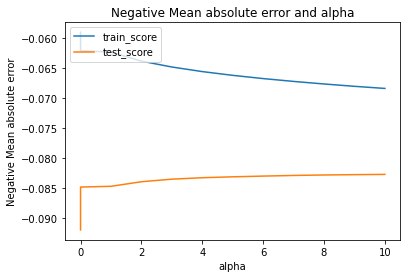

In [152]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean absolute error')
plt.title('Negative Mean absolute error and alpha')
plt.legend(['train_score','test_score'],loc='upper left')
plt.show()

At alpha=2 the test and train are having the maximum value

In [153]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.45407905e-02,  1.26634746e-02,  2.37042424e-02,  6.00581266e-02,
        4.64768569e-02,  2.69416550e-02,  9.59263837e-03,  3.22372996e-02,
        4.84243014e-02,  5.02719102e-02,  2.14957422e-03,  8.09581915e-02,
        1.36495745e-02,  9.28306092e-04,  5.88020684e-03,  5.68820116e-03,
        1.51983753e-03, -1.22271640e-02,  5.69869012e-03,  2.45949938e-02,
        1.09630897e-02,  6.57228676e-03,  8.71952338e-03,  5.15802008e-03,
        9.09031036e-03, -3.77919691e-03,  6.49350746e-02,  1.46663364e-01,
        1.35642669e-01,  1.52972504e-01,  1.23713690e-01,  9.01177930e-02,
       -2.66615191e-02,  2.29679671e-02,  6.44114170e-03, -1.44898752e-02,
        1.97450477e-03,  1.27154241e-02,  1.06339826e-02,  2.02522508e-02,
       -2.98013711e-02,  3.64611126e-02, -1.80714952e-02,  1.10945016e-02,
       -9.92705006e-03,  2.24603512e-02, -9.82375840e-02, -2.03308985e-02,
       -4.31992926e-02,  2.23914908e-02,  4.42294073e-02, -1.70813871e-02,
        1.35546333e-01, -

In [154]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_ridge_df = list(zip(cols, model_parameters))

In [155]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9451261743699833
0.9153682416328921


In [156]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11410646145488015


In [157]:
Final_params_ridge = pd.DataFrame(model_rigde_df)
Final_params_ridge.columns = ['Feature', 'Coeff']
Final_params_ridge = Final_params_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
Final_params_ridge.head(10)

,Feature,Coeff
0,constant,11.542
30,MSZoning_RL,0.153
28,MSZoning_FV,0.147
53,Neighborhood_Crawfor,0.136
29,MSZoning_RH,0.136
31,MSZoning_RM,0.124
239,SaleType_New,0.121
196,Functional_Typ,0.092
73,Condition1_Norm,0.092
69,Neighborhood_StoneBr,0.091


## Lasso

In [167]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [168]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.179555,0.015254,0.010640,0.004623,0.0001,{'alpha': 0.0001},-0.099432,-0.075003,-0.080336,-0.081500,...,-0.084519,0.008281,2,-0.058280,-0.064417,-0.064248,-0.063847,-0.062361,-0.062631,0.002293
1,0.043060,0.007748,0.002000,0.003999,0.001,{'alpha': 0.001},-0.093632,-0.076504,-0.081493,-0.078857,...,-0.082747,0.005906,1,-0.071960,-0.075646,-0.074380,-0.074959,-0.073524,-0.074094,0.001274
2,0.017628,0.010026,0.005727,0.005756,0.01,{'alpha': 0.01},-0.100929,-0.090683,-0.088686,-0.085075,...,-0.091754,0.005330,3,-0.087342,-0.090192,-0.090769,-0.092321,-0.089495,-0.090024,0.001633
3,0.011390,0.000493,0.004597,0.000490,0.05,{'alpha': 0.05},-0.127875,-0.116849,-0.111417,-0.110937,...,-0.116411,0.006141,4,-0.112411,-0.114516,-0.117618,-0.117385,-0.114556,-0.115297,0.001961
4,0.011052,0.005793,0.005123,0.005705,0.1,{'alpha': 0.1},-0.161239,-0.147951,-0.157776,-0.140682,...,-0.150370,0.007883,5,-0.146305,-0.148002,-0.152082,-0.149955,-0.149508,-0.149171,0.001938


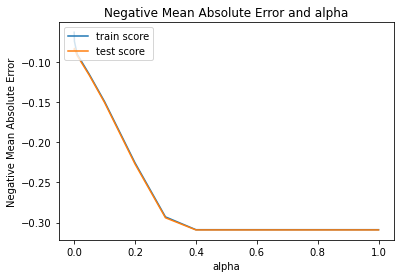

In [169]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [170]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00382481,  0.01277862,  0.01454209,  0.11435976,  0.04397853,
        0.02857227,  0.        ,  0.04965516,  0.        ,  0.        ,
       -0.        ,  0.13439352,  0.01177089,  0.        ,  0.        ,
        0.        , -0.        , -0.00982595,  0.02319803,  0.03991031,
        0.0027195 ,  0.00107909,  0.        ,  0.        ,  0.00039263,
       -0.        ,  0.09336472,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.  

In [171]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('MSSubClass', -0.004),
 ('LotFrontage', 0.013),
 ('LotArea', 0.015),
 ('OverallQual', 0.114),
 ('OverallCond', 0.044),
 ('BsmtFinSF1', 0.029),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.134),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', 0.023),
 ('GarageArea', 0.04),
 ('WoodDeckSF', 0.003),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('HouseAge', 0.093),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_None', -0.0),
 ('Alley_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('

In [172]:
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8917463406870274
0.8925212927045457


In [173]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1285892824164898


In [175]:
lasso_list=list(zip(cols,model_parameters))
lasso_df=pd.DataFrame(lasso_list)
lasso_df.columns=['Feature','Coefficent']
lasso_df.head()
lasso_df[(lasso_df['Coefficent']!=0)].sort_values((['Coefficent']), axis = 0, ascending = False)

,Feature,Coefficent
0,constant,12.023
12,GrLivArea,0.134
4,OverallQual,0.114
27,HouseAge,0.093
8,TotalBsmtSF,0.050
5,OverallCond,0.044
20,GarageArea,0.040
6,BsmtFinSF1,0.029
19,Fireplaces,0.023
3,LotArea,0.015


The final model equation is y=12.023+0.134x1+0.114x3+0.093x4+0.050x5+0.044x6+0.040x7+0.029x8+0.023x9+0.015x10+0.013x11+0.012x12+0.003x13+0.001x14+0.001x15-0.004x16-0.010x17

### Assignment Questions(Part-2)

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ridge with alpha 2*2=4

In [186]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_ridge_df_2=list(zip(cols, model_parameters))

In [187]:
Final_params_ridge_2 = pd.DataFrame(model_ridge_df_2)
Final_params_ridge_2.columns = ['Feature', 'Coeff']
Final_params_ridge_2 = Final_params_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
Final_params_ridge_2.head(10)

,Feature,Coeff
0,constant,11.542
30,MSZoning_RL,0.153
28,MSZoning_FV,0.147
53,Neighborhood_Crawfor,0.136
29,MSZoning_RH,0.136
31,MSZoning_RM,0.124
239,SaleType_New,0.121
196,Functional_Typ,0.092
73,Condition1_Norm,0.092
69,Neighborhood_StoneBr,0.091


In [188]:
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9421888265197005
0.9150021235812903


In [189]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11435300809568064


Lasso with alpha=0.01*2=0.02

In [182]:
alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.009),
 ('LotArea', 0.01),
 ('OverallQual', 0.12),
 ('OverallCond', 0.028),
 ('BsmtFinSF1', 0.028),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.051),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.126),
 ('BsmtFullBath', 0.005),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.02),
 ('GarageArea', 0.04),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('HouseAge', 0.08),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_None', 0.0),
 ('Alley_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig

In [183]:
lasso_list_2=list(zip(cols,model_parameters))
lasso_df_2=pd.DataFrame(lasso_list_2)
lasso_df_2.columns=['Feature','Coefficent']
lasso_df_2.head()
lasso_df_2[(lasso_df_2['Coefficent']!=0)].sort_values((['Coefficent']), axis = 0, ascending = False)

,Feature,Coefficent
0,constant,12.024
12,GrLivArea,0.126
4,OverallQual,0.120
27,HouseAge,0.080
8,TotalBsmtSF,0.051
20,GarageArea,0.040
5,OverallCond,0.028
6,BsmtFinSF1,0.028
19,Fireplaces,0.020
3,LotArea,0.010


In [184]:
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8796208541013629
0.8791095159318444


In [185]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13637652308266543


3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [194]:
# Data preperation for ridge regression
X_train_new_ridge=X_train.drop(['MSZoning_RL','MSZoning_FV','Neighborhood_Crawfor','MSZoning_RH','MSZoning_RM'],axis=1)
X_train_new_ridge.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=241)

In [191]:
# Data preparation for lasso regression
X_train_new_lasso=X_train.drop(['GrLivArea','OverallQual','HouseAge','TotalBsmtSF','OverallCond'],axis=1)

In [196]:
# Building ridge model after removing the top 5 features
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new_ridge, y_train)
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_ridge_df_3=list(zip(cols, model_parameters))
Final_params_ridge_3 = pd.DataFrame(model_ridge_df_3)
Final_params_ridge_3.columns = ['Feature', 'Coeff']
Final_params_ridge_3 = Final_params_ridge_3.sort_values((['Coeff']), axis = 0, ascending = False)
Final_params_ridge_3.head(10)

,Feature,Coeff
0,constant,11.693
234,SaleType_CWD,0.127
28,MSZoning_FV,0.112
68,Neighborhood_Somerst,0.093
191,Functional_Maj2,0.090
235,SaleType_Con,0.086
106,RoofMatl_Tar&Grv,0.084
12,GrLivArea,0.081
240,SaleType_Oth,0.079
74,Condition1_PosA,0.076


In [193]:
# Building lasso model after removing the top 5 features
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new_lasso, y_train)
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_list_2=list(zip(cols,model_parameters))
lasso_df_2=pd.DataFrame(lasso_list_2)
lasso_df_2.columns=['Feature','Coefficent']
lasso_df_2.head()
lasso_df_2[(lasso_df_2['Coefficent']!=0)].sort_values((['Coefficent']), axis = 0, ascending = False)

,Feature,Coefficent
0,constant,11.992
6,BsmtFinSF1,0.141
7,BsmtFinSF2,0.086
141,ExterCond_Fa,0.082
16,HalfBath,0.071
4,OverallQual,0.047
11,LowQualFinSF,0.047
15,FullBath,0.034
12,GrLivArea,0.033
178,Heating_Wall,0.032
